<h1>IMPortation des Bibliotèques</h1>

In [15]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy import fftpack
import soundfile as sf

<h2>FONCTION Tansformée de fourier </h2>

In [16]:
# Fonction de convertion de fichier audio en signale periodique
# Puis transformation en signaux de frequence
def Tansformation_fourier(Sound_Inital):
    signal_Periodique, fs = librosa.load(Sound_Inital, sr=None)  #Chargement du signal audio
    table_time = np.linspace(0, len(signal_Periodique) / fs, num=len(signal_Periodique))  #Creation de table de temps
    #(Transformation de fourier)
    fourier = fftpack.fft(signal_Periodique)    #Transformation des valeurs periodique en amplitude de frequence

    frequences = fftpack.fftfreq(signal_Periodique.size) #Calcul des fréquences correspondantes
    return fourier, frequences ,fs              #Un tuple contenant le spectre de Fourier et les fréquences correspondantes.

<h2>FONCTION de visualisation </h2>

In [28]:
#Fonction de visualisation des Types de frequence disponible sur l'audio
def visualisation(Sound_Inital):
    fourier, frequences,fs=Tansformation_fourier(Sound_Inital)
    print("Visualisation du Diagramme avec les Different Amplitude de frequence ")
    plt.figure(figsize=(11, 8))
    plt.plot(np.abs(frequences), np.abs(fourier))
    plt.title("Type de frequence")
    plt.xlabel("Frequence")
    plt.ylabel("Amplitude")
    plt.show()

<h2>FONCTION de Reduction du Bruit  et de reconstruction du son audio</h2>

In [41]:
#Fonction de Réduction le bruit d'un fichier audio en supprimant les fréquences avec
#une amplitude inférieure à un seuil donné.
#Frequence_Morte:  Seuil d'amplitude en dessous duquel les fréquences sont supprimées.
def Reduction_Bruit(Sound_Inital,Frequence_Morte,Sound_final):
    fourier, frequences,fs=Tansformation_fourier(Sound_Inital)
    Amplitude=np.abs(fourier)
    fourier[Amplitude < Frequence_Morte] = 0  # supppression des frequence avec une amplitude < au bruit
                                              #Transformation de fourier inverse
    signal_filter = fftpack.ifft(fourier)     # Transformation inverse de Fourier pour obtenir le signal filtré

    signal_filter = signal_filter.astype(np.float32)  #Obtenir les parties réel du signal fitré
    sf.write(Sound_final, signal_filter, fs)          #Écriture du signal filtré dans un fichier audio

<h2>Partie de Test </h2>

In [42]:
Sound_Inital='bonjour5.mp3'            #Importation du fichier audio Initial
Sound_final='Sound_finale.wav'              #Creation d'un fichier ou sera stocké le resultat après traitement

Audio(Sound_Inital, autoplay=True)         #Jouer le Son Audio
#Audio(Sound_final, autoplay=True)

Visualisation du Diagramme avec les Different Amplitude de frequence 


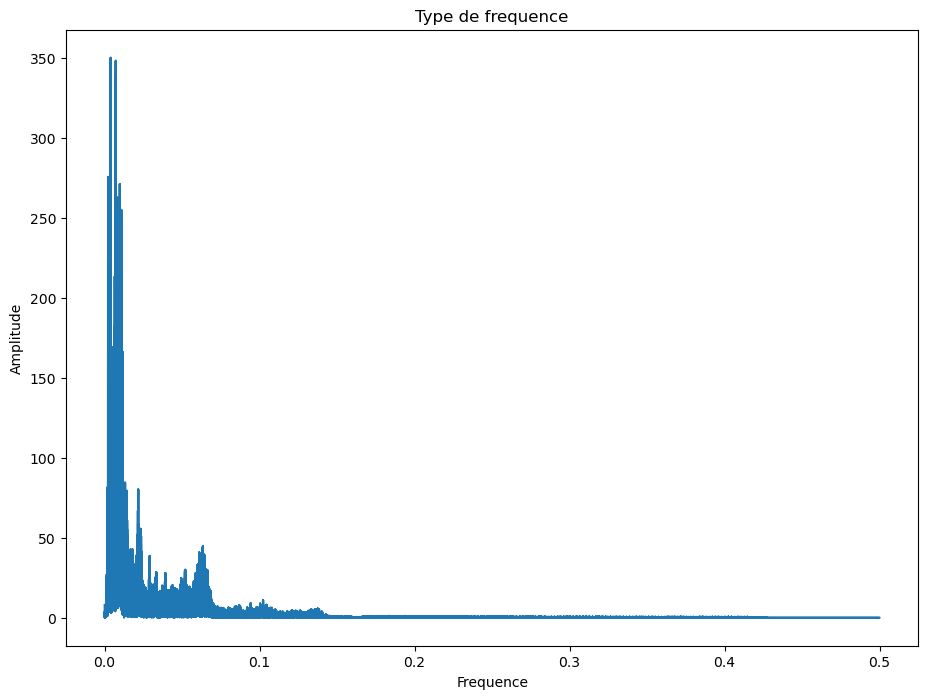

In [43]:
visualisation(Sound_Inital)

In [44]:
Reduction_Bruit(Sound_Inital,15,Sound_final)

C:\Users\NEIGEREINE\AppData\Local\Temp\ipykernel_10184\3697801994.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  signal_filter = signal_filter.astype(np.float32)  #Obtenir les parties réel du signal fitré


In [45]:
Audio(Sound_final, autoplay=True)

In [ ]:
visualisation(Sound_Inital)
Reduction_Bruit(Sound_Inital,15,Sound_final)
Audio(Sound_final, autoplay=True)